In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style='white', palette='muted', color_codes=True)
import plotly.express as px
import io 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [2]:
from sklearn.preprocessing import LabelEncoder  #Changes categorical text data to numerical
from sklearn.preprocessing import OneHotEncoder # Changes cat to numerical only that its better -- check notes for difference
from sklearn.preprocessing import OrdinalEncoder #
from sklearn.preprocessing import StandardScaler #
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #
from sklearn.linear_model import LinearRegression #
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score #
from sklearn.metrics import mean_squared_error #
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.ensemble import RandomForestRegressor #
from sklearn.compose import ColumnTransformer
import warnings # suppresses pesky warnings??
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [3]:
df = pd.read_csv(r'C:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')

In [4]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [11]:
# y = df["charges"]
X = df.drop(['charges'], axis=1) #Features


In [13]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), ['age','bmi']),   # All the categorical columns
    ("cat", OrdinalEncoder(), ['sex', 'children', 'smoker', 'region']) ]) # All the non-categorical columns
x = pd.DataFrame(full_pipeline.fit_transform(X))
y = df["charges"]

print('regression x and y assigned')

regression x and y assigned


In [14]:
x.head()

,0,1,2,3,4,5
0,-1.438764,-0.453320,0.0,0.0,1.0,3.0
1,-1.509965,0.509621,1.0,1.0,0.0,2.0
2,-0.797954,0.383307,1.0,3.0,0.0,2.0
3,-0.441948,-1.305531,1.0,0.0,0.0,1.0
4,-0.513149,-0.292556,1.0,0.0,0.0,1.0


In [15]:
TEST_SIZE = 0.3
RANDOM_STATE = 42 


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE ,random_state=RANDOM_STATE )

print('Splitting complete')

Splitting complete


In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

ValueError: Unknown label type: 'continuous'

In [10]:
# numerical_ix = X.select_dtypes(include=['float64']).columns
# categorical_ix = X.select_dtypes(include=['object']).columns

# #define the data preparation for the columns
# t = [('cat', OneHotEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
# transform = ColumnTransformer(transformers=t)

# X = transform.fit_transform(X)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

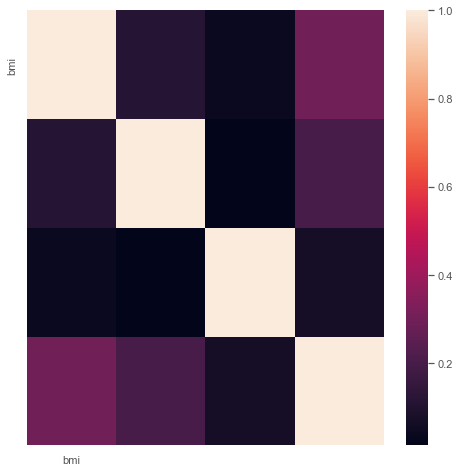

In [8]:
#TO DO: Print a heatmap of correlation between features
plt.figure(figsize=(8, 8))
 
sns.heatmap(df.corr(), cbar=True, annot=False, yticklabels=numerical_ix,
            xticklabels=numerical_ix);